In [1]:
!jupyter nbconvert --to script Spearman_ESR1.ipynb

[NbConvertApp] Converting notebook Spearman_ESR1.ipynb to script
[NbConvertApp] Writing 4258 bytes to Spearman_ESR1.py


In [1]:
import cptac
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats 

In [2]:
cptac.download(dataset="Brca")
br = cptac.Brca()

protein_data = br.get_proteomics()

#The dataframes are MultIndex pandas dataframes. 
#However, to teach the basics of pandas, we will remove the "multi" part of the dataframe.
protein_data = protein_data.droplevel(1, axis=1)

rna_data = br.get_transcriptomics()
clinical_data = br.get_clinical()

In [3]:
clinical_data["Age_in_years"] = clinical_data["Age.in.Month"]/12

In [4]:
assert list(rna_data.index) == list(protein_data.index)

In [5]:
rna_esr1 = rna_data.loc[: , "ESR1"]
protein_esr1 = protein_data.loc[: , "ESR1"]

rho, spear_pvalue = stats.spearmanr( rna_esr1, protein_esr1 )

rho_check, spear_pvalue_check = stats.spearmanr( protein_esr1, rna_esr1 )

assert rho == rho_check

1.3918996725088342
-0.1305564595801543


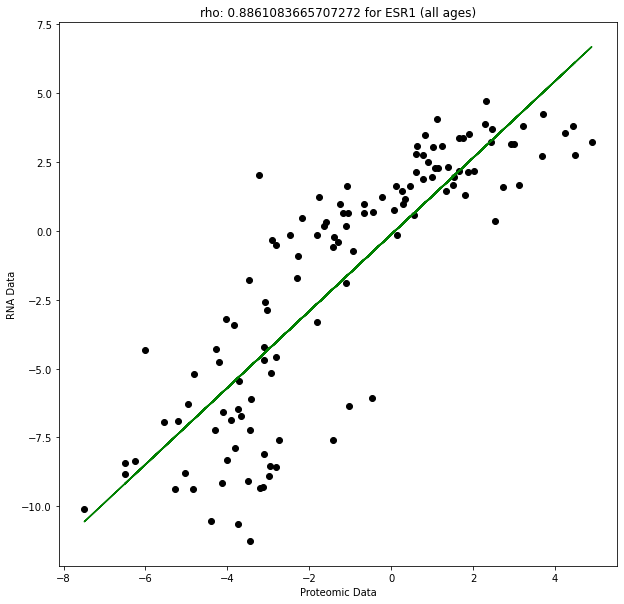

In [16]:
plt.figure( figsize=(10,10) )

m, b = np.polyfit(protein_esr1, rna_esr1, 1)
print(m)
print(b)
#Replace x and y with appropriate variables
plt.scatter( protein_esr1, rna_esr1, c='black')
plt.plot(protein_esr1, m*protein_esr1 + b, 'g')

title = "rho: {} for ESR1 (all ages)".format(rho) #This is string formatting. The variable in the () will print in the {}
plt.title(title)

#Fill in informative x and y labels
plt.xlabel("Proteomic Data")
plt.ylabel("RNA Data")

#plt.show() #Comment out when running in script
plt.savefig( "/Users/Christopher/Desktop/Datanalysis/qbio_data_analysis_Chris/final_proj/SpearGraphALL.png", bbox_inches="tight" )

In [11]:
#What column of clinical_data is referring to age?
young_mask = clinical_data["Age_in_years"] < 50.0
old_mask = clinical_data["Age_in_years"] >= 50.0

#Check for understanding: Why do the below lines work?
rna_esr1_young = rna_data["ESR1"][ young_mask ]
protein_esr1_young = protein_data["ESR1"][ young_mask ]

#We want all patients of the ESR1 column
rna_esr1_old = rna_data["ESR1"][ old_mask ]
protein_esr1_old = protein_data["ESR1"][ old_mask ]

1.3766388070121192
1.0897351507625626


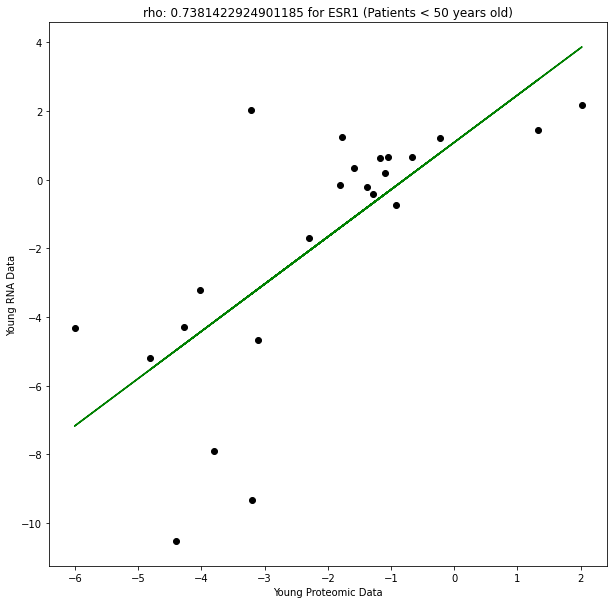

In [14]:
#YOUNG PLOT
rho_young, spear_pvalue_young = stats.spearmanr( rna_esr1_young, protein_esr1_young )

plt.figure( figsize=(10,10) )
m, b = np.polyfit(protein_esr1_young, rna_esr1_young, 1)
print(m)
print(b)
#Replace x and y with appropriate variables
plt.scatter( protein_esr1_young, rna_esr1_young, c='black' )
plt.plot(protein_esr1_young, m*protein_esr1_young + b, 'g')

title = "rho: {} for ESR1 (Patients < 50 years old)".format(rho_young) #This is string formatting. The variable in the () will print in the {}
plt.title(title)

plt.xlabel("Young Proteomic Data")
plt.ylabel("Young RNA Data")

#plt.show() #Comment out when running in script
plt.savefig( "/Users/Christopher/Desktop/Datanalysis/qbio_data_analysis_Chris/final_proj/SpearGraphYOUNG.png", bbox_inches="tight" )

1.4094004530414235
-0.04261184063753553


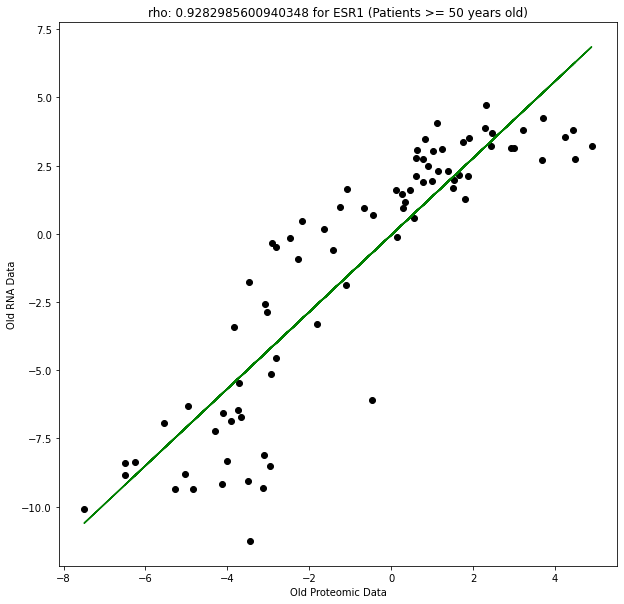

In [15]:
#OLD PLOT
rho_old, spear_pvalue_old = stats.spearmanr( rna_esr1_old, protein_esr1_old )

plt.figure( figsize=(10,10) )
m, b = np.polyfit(protein_esr1_old, rna_esr1_old, 1)
print(m)
print(b)
#Replace x and y with appropriate variables
plt.scatter( protein_esr1_old, rna_esr1_old, c='black' )
plt.plot(protein_esr1_old, m*protein_esr1_old + b, 'g')

title = "rho: {} for ESR1 (Patients >= 50 years old)".format(rho_old) #This is string formatting. The variable in the () will print in the {}
plt.title(title)

plt.xlabel("Old Proteomic Data")
plt.ylabel("Old RNA Data")

#plt.show() #Comment out when running in script
plt.savefig( "/Users/Christopher/Desktop/Datanalysis/qbio_data_analysis_Chris/final_proj/SpearGraphOLD.png", bbox_inches="tight" )

In [ ]:
def spear_rho_plot(rna, protein, genename, figsz=10, pathout):
    rho = stats.spearmanr(rna, protein)
    m, b = np.polyfit(protein, rna, 1)
    plt.figure(figsize=(figsz, figsz))
    
    plt.scatter(protein, rna, c="black")
    plt.plot(protein, m*protein + b, 'g')
    
    title = "rho: {0} for {1}".format(rho_old, genename) #This is string formatting. The variable in the () will print in the {}
    plt.title(title)
    plt.xlabel("Proteomic Data")
    plt.ylabel("RNA Data")
    
    plt.savefig(pathout, bbox_inches="tight" )